In [0]:
#import packages 
import pandas as pd
import numpy as np
from sklearn import linear_model
import sklearn
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [11]:
#read in file
data = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')

data.info()
data.describe()

#look at first ten records
data.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
cvd_4types      3242 non-null int64
age_s1          3242 non-null int64
race            3242 non-null int64
educat          3242 non-null int64
mstat           3242 non-null int64
hip             3242 non-null float64
neck20          3242 non-null float64
waist           3242 non-null float64
av_weight_kg    3242 non-null float64
cgpkyr          3242 non-null float64
tea15           3242 non-null int64
srhype          3242 non-null int64
parrptdiab      3242 non-null int64
bend25          3242 non-null int64
happy25         3242 non-null int64
tired25         3242 non-null int64
hlthlm25        3242 non-null int64
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.00,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.00,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.50,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.00,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.00,0,0,0,2,1,1,2
5,0,67,1,3,3,140.0,35.5,101.0,87.2,0.00,0,1,0,1,1,4,4
6,0,68,1,2,1,101.0,39.0,93.0,80.5,9.20,0,0,0,2,3,4,4
7,0,67,1,2,1,107.0,32.0,80.0,73.2,0.00,0,1,0,2,2,4,4
8,0,44,1,2,1,100.0,36.5,89.0,79.1,6.75,0,0,0,3,3,4,4
9,0,42,1,2,1,105.0,35.5,90.0,78.1,21.00,0,0,0,3,2,3,3


##Part 1

In [0]:
import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

mm_scaler = preprocessing.MinMaxScaler()
new_array = mm_scaler.fit_transform(data.drop('cvd_4types',axis=1))

#independent and dependent variables
y = data['cvd_4types']

#splitting training and testing set
X_train, X_test, y_train, y_test = train_test_split(new_array, y, test_size=0.33,random_state=99)

# Without Hyperparameters

In [13]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
ypred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, ypred)

ypred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, ypred_prob)
aucscore = metrics.auc(fpr, tpr)

print("Accuracy:", accuracy)
print("AUC:", aucscore)

Accuracy: 0.6953271028037383
AUC: 0.7065739861267019


In [0]:
C = np.logspace(0, 4, 10)
solver = ['sag','lbfgs','newton-cg']

# Create hyperparameter options
random_state = [99]
hyperparameters = dict(C=C, solver=solver, random_state=random_state)

In [15]:
from sklearn.model_selection import GridSearchCV

clfmodel = GridSearchCV(lr_model, hyperparameters, cv=5)
best = clfmodel.fit(X_train, y_train)

#find best hyperparameters
print('Best Solver:', best.best_estimator_.get_params()['solver'])
print('Best C:', best.best_estimator_.get_params()['C'])

Best Solver: sag
Best C: 2.7825594022071245


Best Model trained

In [16]:
lr_best = LogisticRegression(C=2.78, solver='sag', random_state=99)
lr_best.fit(X_train,y_train)
y_pred = lr_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.6953271028037383

#Part 2

In [17]:
lr_best = linear_model.LogisticRegression(random_state=99, penalty='l2', C=2.78, solver='sag')
lr_best.fit(X_train/np.std(X_train,0),y_train)

values=pd.Series(lr_best.coef_[0])
values.sort_values(ascending=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


6     1.082545
2     0.196977
11    0.150095
12    0.091778
10    0.050337
0     0.028388
14    0.024949
8     0.013772
9    -0.032717
13   -0.064462
3    -0.102141
5    -0.142069
7    -0.218558
15   -0.333967
1    -0.384676
4    -0.555986
dtype: float64

# Part 3

In [0]:
y_score = lr_best.predict(X_test)

#Confusion Matrix
matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = matrix.ravel()

In [0]:
#Precision and Recall
precision = tp/(tp+fp)
recall = tp/(tp+fn)

In [0]:
#f1 score
f1 = sklearn.metrics.f1_score(y_test, y_pred,average='binary')
calc_f1 = 2*precision*recall/(precision+recall)

In [0]:
#Accuracy and AUC
acc1 = accuracy_score(y_test, ypred)
ypred_prob = lr_best.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, ypred_prob)
auc_score = metrics.auc(fpr, tpr)

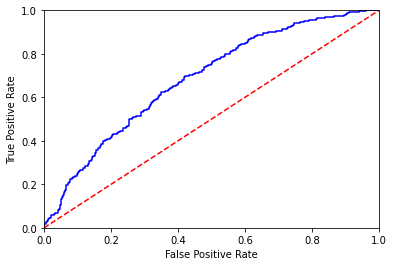

In [23]:
#ROC
plt.plot(fpr, tpr, 'b', auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

In [24]:
print(matrix)
print('Precision:',precision)
print('Recall:', recall)
print('f1 score:',f1)
print('calculated f1 score:',calc_f1)
print('Accuracy:', acc1)
print('AUC:', auc_score)

[[212 232]
 [ 94 532]]
Precision: 0.6963350785340314
Recall: 0.8498402555910544
f1 score: 0.7654676258992806
calculated f1 score: 0.7654676258992806
Accuracy: 0.6953271028037383
AUC: 0.6844472267794951
